In [93]:
#IMPORTING THE DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [94]:
df = pd.read_csv('insurance_claims.csv')

In [95]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [96]:
df.shape

(1000, 40)

In [97]:
#We can see that there are few ? in collision_type column...let's replace all the ? by Nan which indicates missing values
df.replace('?', np.nan, inplace = True)

In [98]:
# Count NaN values in multiple columns of DataFrame
nan_count = df.isna().sum()
print(nan_count)

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [99]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})


missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

In [100]:
missing_value_df

,column_name,percent_missing
_c39,_c39,100.0
property_damage,property_damage,36.0
police_report_available,police_report_available,34.3
collision_type,collision_type,17.8
bodily_injuries,bodily_injuries,0.0
incident_state,incident_state,0.0
incident_city,incident_city,0.0
incident_location,incident_location,0.0
incident_hour_of_the_day,incident_hour_of_the_day,0.0
number_of_vehicles_involved,number_of_vehicles_involved,0.0


In [101]:
#Let's drop the _c39 column because all the values are missing in that column
# Remove column name 'A'
df.drop(['_c39'], axis=1,inplace=True)

In [102]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [103]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [104]:
#Replace the missing values with their respective modes
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [105]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

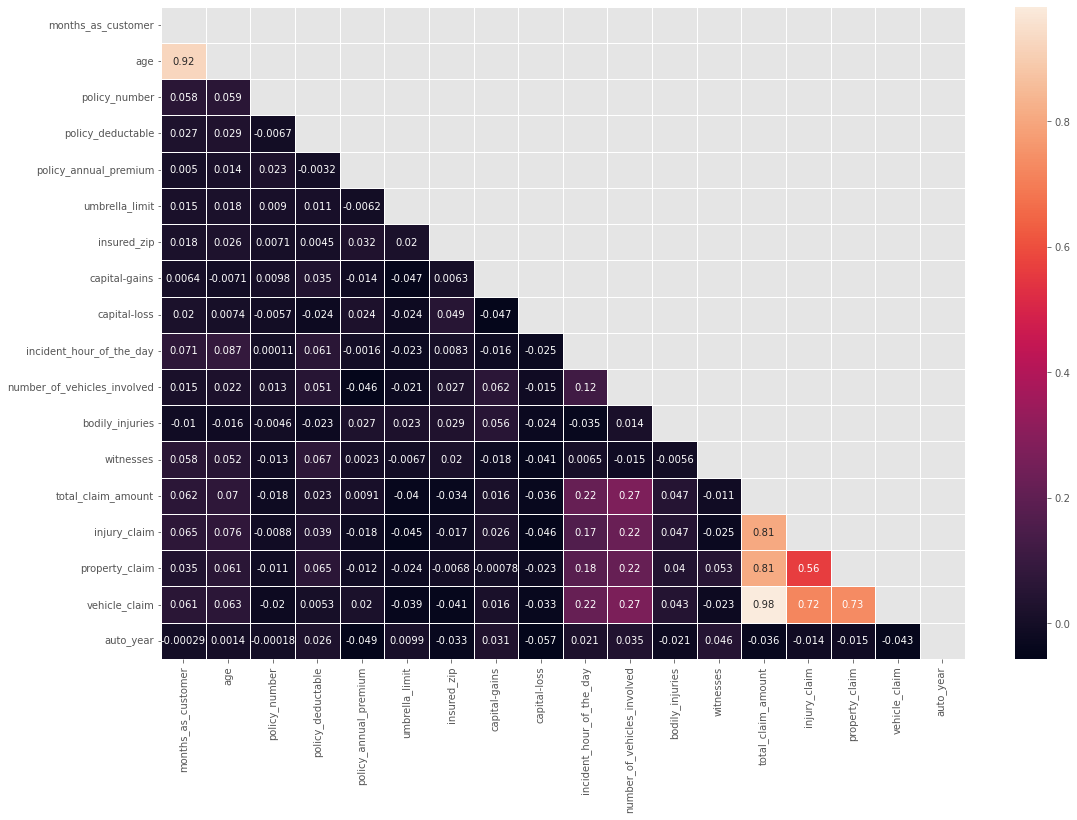

In [106]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [107]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y
2,134,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N


In [108]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [109]:
y = y.map({'Y': 1, 'N': 0})  

In [110]:
y.value_counts(normalize=True)*100

0    75.3
1    24.7
Name: fraud_reported, dtype: float64

In [111]:
df_numerical_features = df.select_dtypes(exclude='object')
df_categorical_features = df.select_dtypes(include='object')

In [112]:
df_numerical_features

,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
0,328,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,6510,13020,52080,2004
1,228,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,780,780,3510,2007
2,134,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,7700,3850,23100,2007
3,256,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,6340,6340,50720,2014
4,228,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,1000,1310.80,0,431289,0,0,20,1,0,1,17440,8720,61040,2006
996,285,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,18080,18080,72320,2015
997,130,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,7500,7500,52500,1996
998,458,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,5220,5220,36540,1998


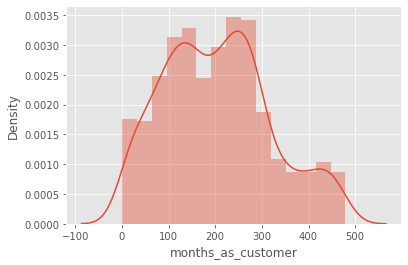

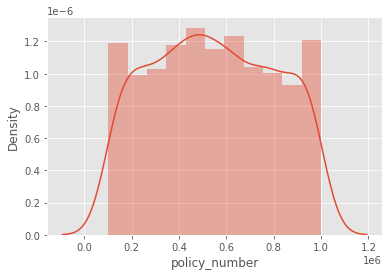

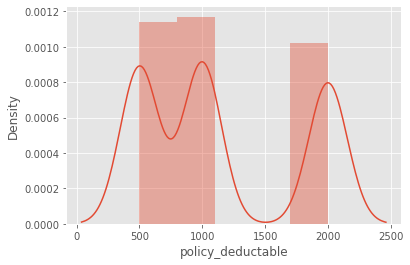

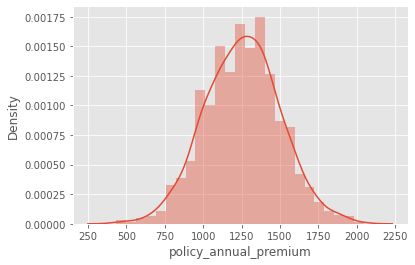

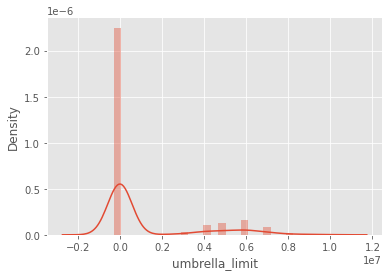

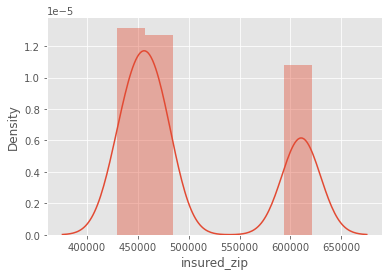

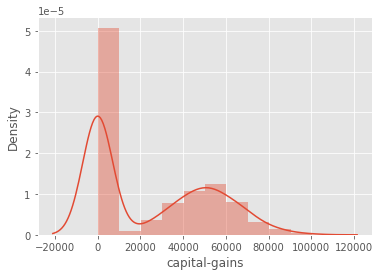

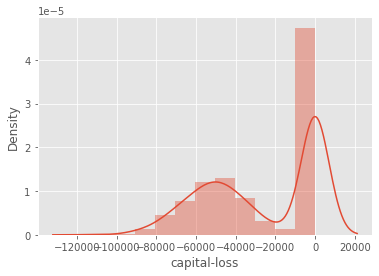

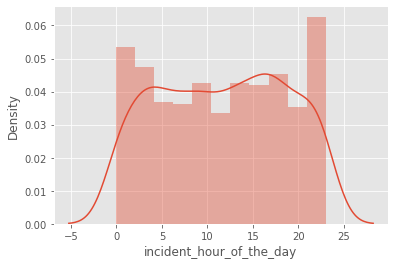

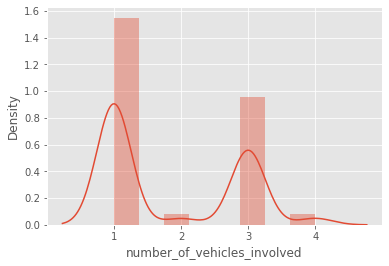

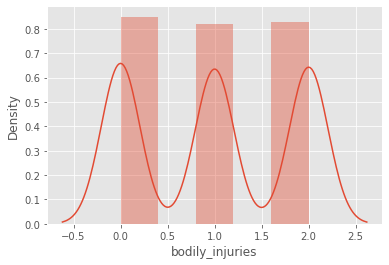

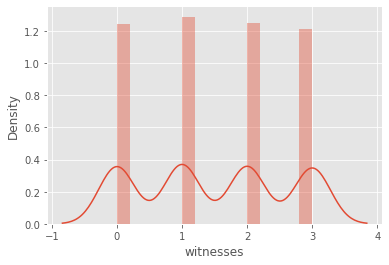

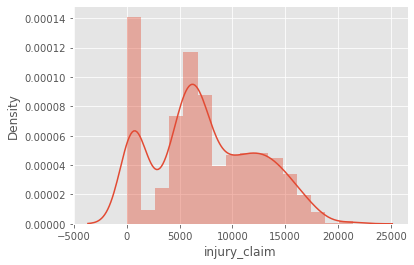

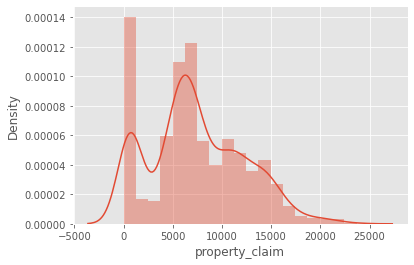

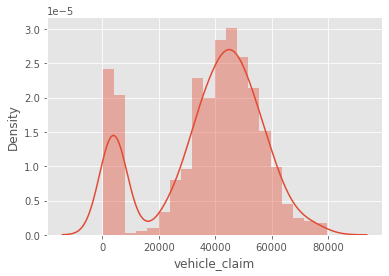

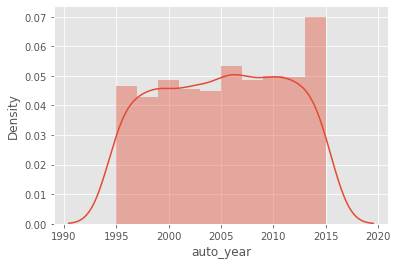

In [113]:
for column in df_numerical_features.columns:
    sns.distplot(df_numerical_features[column])
    
    plt.show()

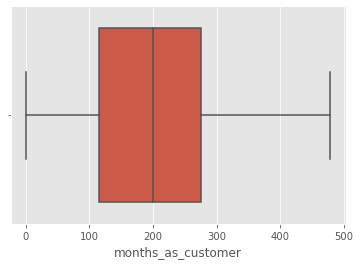

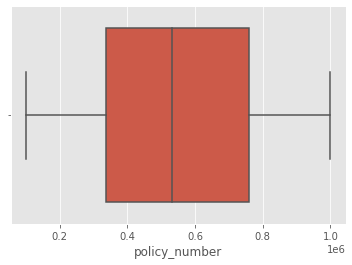

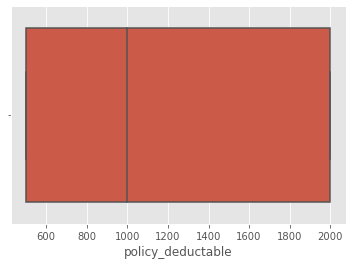

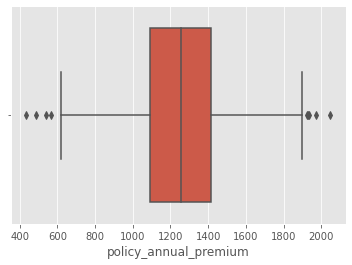

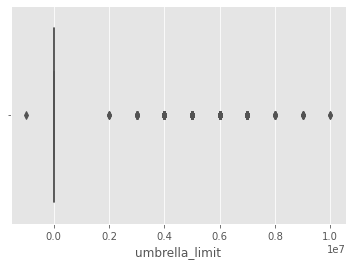

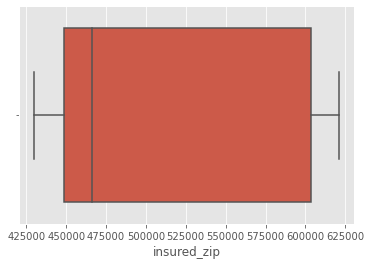

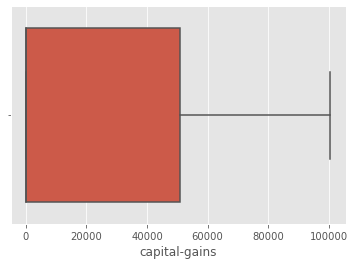

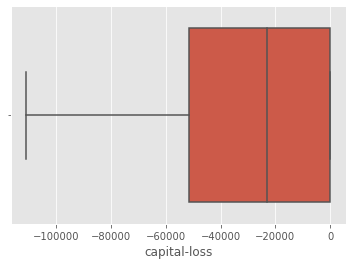

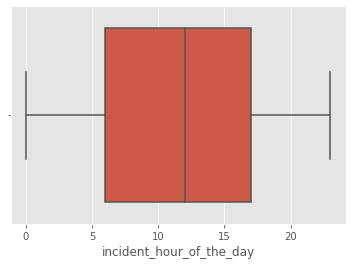

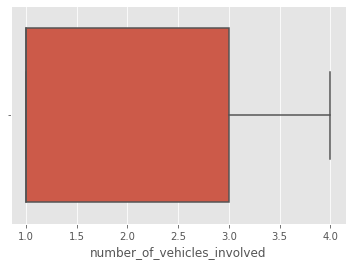

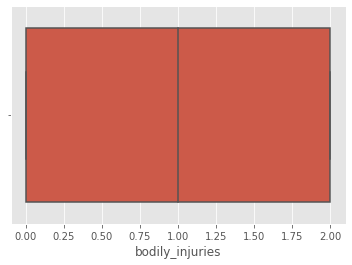

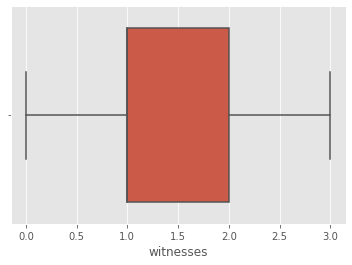

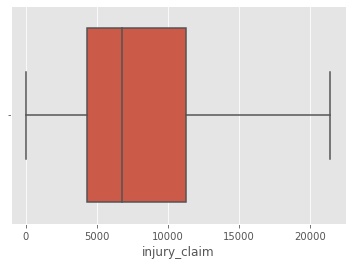

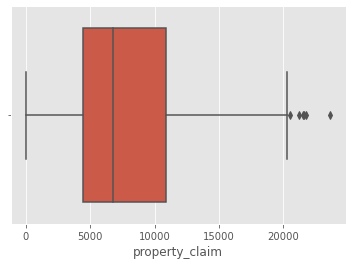

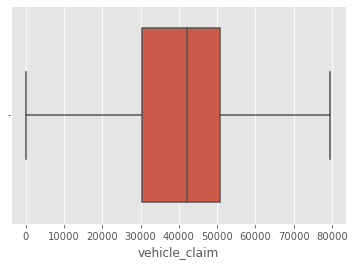

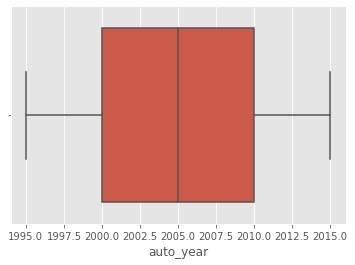

In [114]:
for column in df_numerical_features.columns:
     sns.boxplot(df_numerical_features[column])
    
     plt.show()

In [115]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    # Split columns into numerical and categorical
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Standardize numerical columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)
    
    return df

In [116]:
X = scale_and_encode(X)
X.head()

months_as_customer  policy_number  policy_deductable  \
0            1.078140      -0.095953          -0.222383   
1            0.208995      -0.791527           1.412784   
2           -0.608002       0.550566           1.412784   
3            0.452355      -1.239334           1.412784   
4            0.208995      -0.695834          -0.222383   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0               0.616705       -0.479476    -0.489529       1.011331   
1              -0.242521        1.697980    -0.461008      -0.901927   
2               0.642233        1.697980    -0.984885       0.358023   
3               0.652886        2.133471     1.491682       0.853388   
4               1.341980        2.133471     1.527808       1.467210   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      0.953851                 -0.956261                    -0.823865   
1      0.953851                 -0.524475                    -0.823865   
2      0.953851                 -0.668404                     1.140056   
3     -1.267577                 -0.956261                    -0.823865   
4     -0.683741                  1.202666                    -0.823865   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0         0.009759   0.461838     -0.189283        1.165505       0.749653   
1        -1.210174  -1.338700     -1.363822       -1.372696      -1.823346   
2         1.229693   1.362107      0.054644       -0.736072      -0.785565   
3         0.009759   0.461838     -0.224130       -0.219722       0.677607   
4        -1.210174  -0.438431     -1.257232       -1.399654      -1.768252   

   auto_year  policy_bind_date_1/1/2008  policy_bind_date_1/10/2004  \
0  -0.183440                          0                           0   
1   0.315491                          0                           0   
2   0.315491                          0                           0   
3   1.479664                          0                           0   
4   0.648112                          0                           0   

   policy_bind_date_1/10/2012  policy_bind_date_1/11/2009  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   policy_bind_date_1/11/2010  policy_bind_date_1/12/2010  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   policy_bind_date_1/12/2012  policy_bind_date_1/13/1991  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   policy_bind_date_1/14/1998  policy_bind_date_1/14/1999  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   policy_bind_date_1/14/2005  policy_bind_date_1/14/2008  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   policy_bind_date_1/15/1992  policy_b

In [117]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=19,stratify=y)

In [118]:

from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV

In [119]:
#baseline accuracy = 75.2%

y_test.value_counts(normalize=True)

0    0.755
1    0.245
Name: fraud_reported, dtype: float64

In [120]:
y_test.value_counts()

0    151
1     49
Name: fraud_reported, dtype: int64

In [121]:
base_recall = 49/(49)
base_speci = 0/(151)
base_preci = 49/(200)
base_f1 = 2*base_recall*base_preci/(base_recall+base_preci)


df_prob = pd.DataFrame()
df_prob['y']=y_test
df_prob['pred']=1
auc_score = roc_auc_score(df_prob['y'], df_prob['pred'])


print("If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:")
print("")
print("Sensitivity:", base_recall)
print('Specificity:', base_speci)
print('Precision:', base_preci)
print('F1 score:', base_f1)
print('ROC AUC Score:', auc_score)

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.245
F1 score: 0.393574297188755
ROC AUC Score: 0.5


In [122]:
#function to use for scoring 

def scores(t, name):
    print (name, 'classification metric')
    print("CV scores:", round(t.best_score_,3))
    print("train score:", round(t.score(X_train, y_train),3))
    print("test score:", round(t.score(X_test, y_test),3))

    #Evaluation metrics
    predictions = t.predict(X_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    speci= TN/(TN + FP)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    print(f'Sensitivity: {round(sensi,3)}')
    print(f'Specificity: {round(speci,3)}')
    print(f'Precision: {round(preci,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(X_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))

# LOGISTIC REGRESSION

In [123]:
lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            'class_weight':[{0:0.246667, 1:0.75333},None]}

    
rs_lr = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr.fit(X_train, y_train, )
print(rs_lr.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None, 'C': 910.2981779915227}


# Random Forest

In [124]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             'class_weight':[{0:0.246667, 1:0.75333},None]
              }


    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf.fit(X_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'class_weight': {0: 0.246667, 1: 0.75333}}


In [125]:
#evaluate
classifiers={'logreg':rs_lr,  'Ranfor':rs_rf
             }

for key, value in classifiers.items(): 
    print(scores(value,key))
    print("__________________________")
    print(" ")

logreg classification metric
CV scores: 0.828
train score: 1.0
test score: 0.855
Sensitivity: 0.755
Specificity: 0.887
Precision: 0.685
F1: 0.718
ROC AUC Score: 0.898
None
__________________________
 
Ranfor classification metric
CV scores: 0.789
train score: 0.978
test score: 0.815
Sensitivity: 0.408
Specificity: 0.947
Precision: 0.714
F1: 0.519
ROC AUC Score: 0.782
None
__________________________
 


#Let's use SMOTE

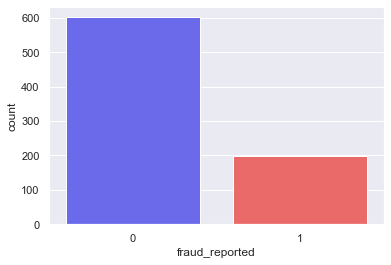

In [127]:
#dist of dv
sns.set()
sns.countplot(x=y_train, palette='seismic');

In [131]:
pip install imblearn


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


1    602
0    602
Name: fraud_reported, dtype: int64


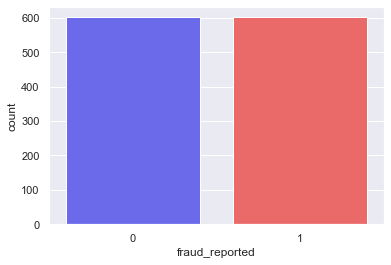

In [132]:
#SMOTE data for train set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(y_train.value_counts())

sns.countplot(x=y_train, palette='seismic');

In [133]:
#ransearch log reg

lr = LogisticRegression(max_iter=200)

lr_values = {'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 50),
            }

    
rs_lr2 = RandomizedSearchCV(lr, lr_values, cv=10, n_jobs = -1, random_state=42)
rs_lr2.fit(X_train, y_train)
print(rs_lr2.best_params_)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 1456.3484775012444}


In [134]:
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf2 = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf2.fit(X_train, y_train)
print(rs_rf2.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


In [135]:
classifiers2={'logreg2':rs_lr2,  'Ranfor2':rs_rf2} 

for key, value in classifiers2.items(): 
    print(scores(value,key))
    print("________________")
    print(" ")

logreg2 classification metric
CV scores: 0.867
train score: 1.0
test score: 0.84
Sensitivity: 0.592
Specificity: 0.921
Precision: 0.707
F1: 0.644
ROC AUC Score: 0.845
None
________________
 
Ranfor2 classification metric
CV scores: 0.854
train score: 0.975
test score: 0.77
Sensitivity: 0.184
Specificity: 0.96
Precision: 0.6
F1: 0.281
ROC AUC Score: 0.741
None
________________
 


In [138]:
pip install mlens

[MLENS] backend: threading


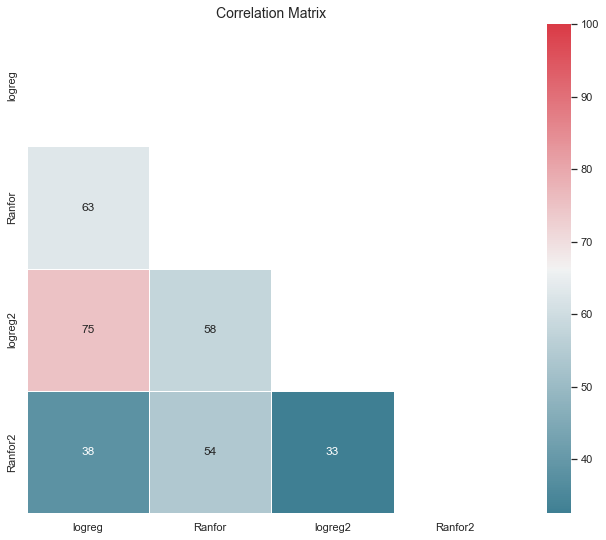

In [139]:
### see correlation of their predictions 
from mlens.visualization import corrmat 
class_dict = {**classifiers, **classifiers2}

Pr = pd.DataFrame(columns=['logreg', 'Ranfor',
                           'logreg2', 'Ranfor2'])

for key, value in class_dict.items():
    
    Pred = value.best_estimator_.predict(X_test)
    Pr[key] = Pred
    

sns.set_style("white")    
ax = corrmat(Pr.corr())

In [141]:
#best estimator
model_1 = rs_lr.best_estimator_
model_2 = rs_rf.best_estimator_
model_3 = rs_lr2.best_estimator_
model_4= rs_rf2.best_estimator_

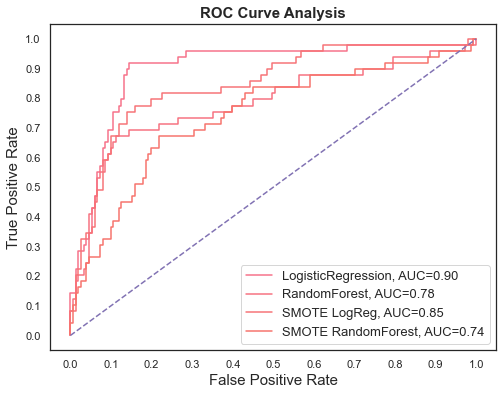

In [151]:
# Instantiate the classfiers and make a list
classifiers_name = [rs_lr.best_estimator_,
                   rs_rf.best_estimator_, 
                   rs_lr2.best_estimator_,
                   rs_rf2.best_estimator_]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_name:
    yproba = cls.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table['names'] = ['LogisticRegression', 'RandomForest','SMOTE LogReg','SMOTE RandomForest']
result_table.set_index('names', inplace=True)
#Plot the figure
fig = plt.figure(figsize=(8,6))

sns.set_style("white")

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='m', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [174]:
rs_lr.best_estimator_

LogisticRegression(C=910.2981779915227, max_iter=200, penalty='l1',
                   solver='liblinear')

In [186]:
#instantiate the model
log_regression = LogisticRegression(C=910.2981779915227, max_iter=200, penalty='l1',
                   solver='liblinear')

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [179]:
from sklearn import metrics

In [180]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[138,  13],
       [ 21,  28]], dtype=int64)

In [182]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.83


,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y
2,134,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,17440,8720,61040,Honda,Accord,2006,N
996,285,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,7500,7500,52500,Suburu,Impreza,1996,N
998,458,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,5220,5220,36540,Audi,A5,1998,N


In [205]:
a = df[['policy_deductable','policy_annual_premium','umbrella_limit','insured_sex','policy_csl','policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','number_of_vehicles_involved','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','police_report_available','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year']]

In [229]:
target = []

In [228]:
a = df['fraud_reported'].to_list()


In [230]:
for i in a:
    if i == 'Y':
        target.append(1)
    else:
        target.append(0)

In [233]:
df['fraud'] = target 

In [234]:
df

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,fraud
0,328,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,6510,13020,52080,Saab,92x,2004,Y,1
1,228,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,780,780,3510,Mercedes,E400,2007,Y,1
2,134,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N,0
3,256,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1
4,228,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,1300,650,4550,Accura,RSX,2009,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,17440,8720,61040,Honda,Accord,2006,N,0
996,285,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,18080,18080,72320,Volkswagen,Passat,2015,N,0
997,130,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,7500,7500,52500,Suburu,Impreza,1996,N,0
998,458,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,5220,5220,36540,Audi,A5,1998,N,0


In [206]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [235]:
target = df[['fraud']]
features = df_encoded


In [207]:
# Select only the categorical columns from the dataframe
categorical_columns = a.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(a, columns=categorical_columns)

In [218]:
df_targeted

NameError: name 'df_targeted' is not defined

In [236]:
model = RandomForestRegressor()
model.fit(features, target)


RandomForestRegressor()

In [237]:
importances = model.feature_importances_

In [239]:
feature_importances = pd.Series(importances, index=features.columns)


In [240]:
feature_importances = feature_importances.sort_values(ascending=False)


In [243]:
feature_importances[0:10]

incident_severity_Major Damage    0.262992
insured_hobbies_chess             0.122317
insured_hobbies_cross-fit         0.078321
property_claim                    0.034810
policy_annual_premium             0.031752
injury_claim                      0.027286
vehicle_claim                     0.023921
incident_hour_of_the_day          0.023644
auto_year                         0.020258
capital-loss                      0.017482
dtype: float64

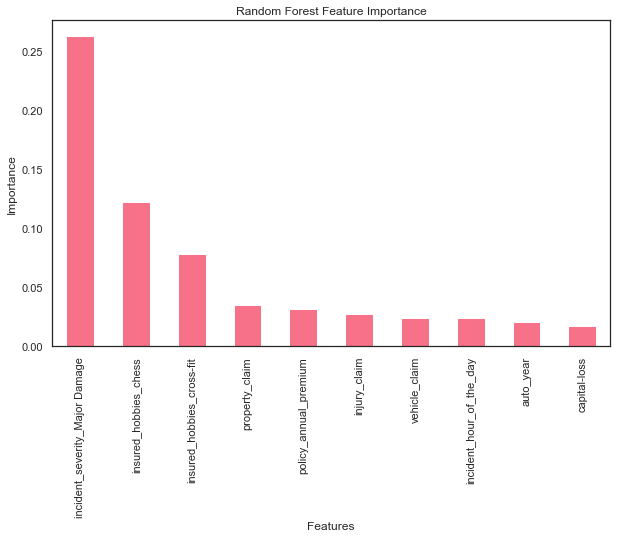

In [244]:
plt.figure(figsize=(10, 6))
feature_importances[0:10].plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
